<a href="https://colab.research.google.com/github/srijachalumuri/OIBSIP/blob/main/LEVEL_1_PROJECT_3(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction:**

Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. Click the blue "Edit Notebook" or "Fork Notebook" button at the top of this kernel to begin editing.

**Exploratory Analysis:**

To begin this exploratory analysis, first use matplotlib to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made. (Hey, I'm just a kerneling bot, not a Kaggle Competitions Grandmaster!)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

There is 1 csv file in the current version of the dataset:

In [3]:
for dirname, _, filenames in os.walk('/content/sample_data/AB_NYC_2019.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [5]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [6]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [7]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# AB_NYC_2019.csv has 48895 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/sample_data/AB_NYC_2019.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'AB_NYC_2019.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 16 columns


In [8]:
df1.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Distribution graphs (histogram/bar graph) of sampled columns:**

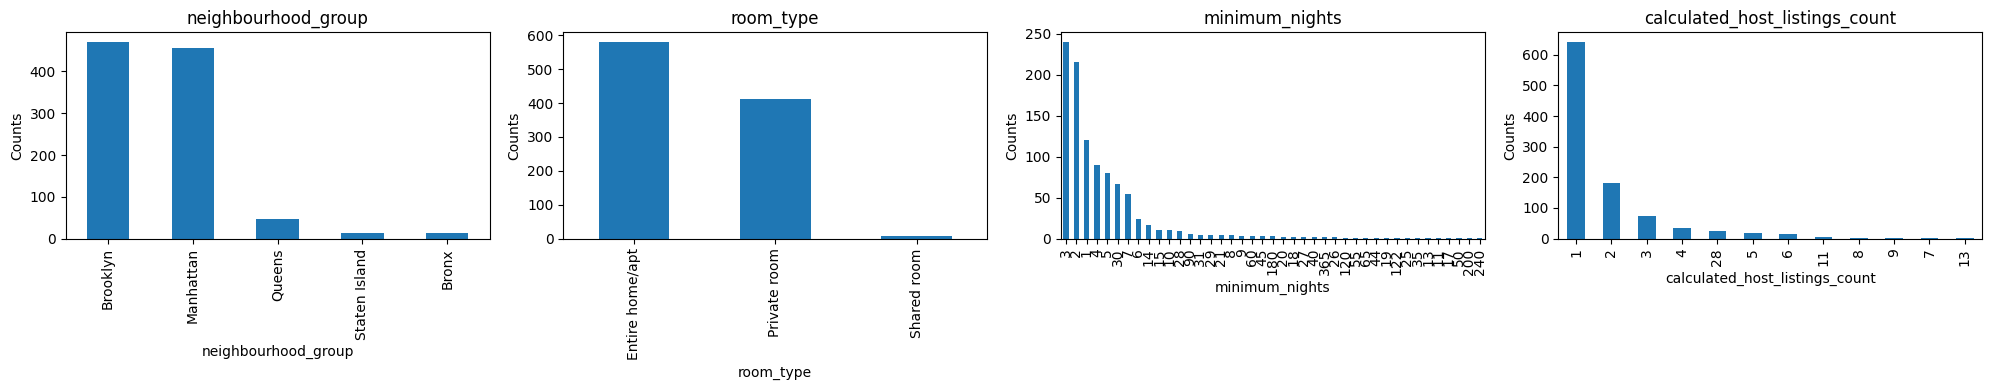

In [14]:
import matplotlib.pyplot as plt
import math

# Define the plotting function
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()

    # For displaying purposes, pick columns that have between 2 and 50 unique values
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]

    nRow, nCol = df.shape
    columnNames = list(df)

    # Calculate number of rows needed to display graphs
    nGraphRow = math.ceil(nCol / nGraphPerRow)

    # Only show at most nGraphShown graphs
    if nCol > nGraphShown:
        print(f"Showing the first {nGraphShown} graphs out of {nCol} columns")
        nCol = nGraphShown

    plt.figure(figsize=(nGraphPerRow * 5, nGraphRow * 4))  # Adjust the figure size

    for i in range(nCol):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        column = columnNames[i]
        df[column].value_counts().plot(kind='bar', title=column)
        plt.ylabel('Counts')
        plt.xlabel(column)

    plt.tight_layout()
    plt.show()

# Plot the distribution graphs
plotPerColumnDistribution(df1, 10, 5)



**plotCorrelationMatrix(df1, 8)**

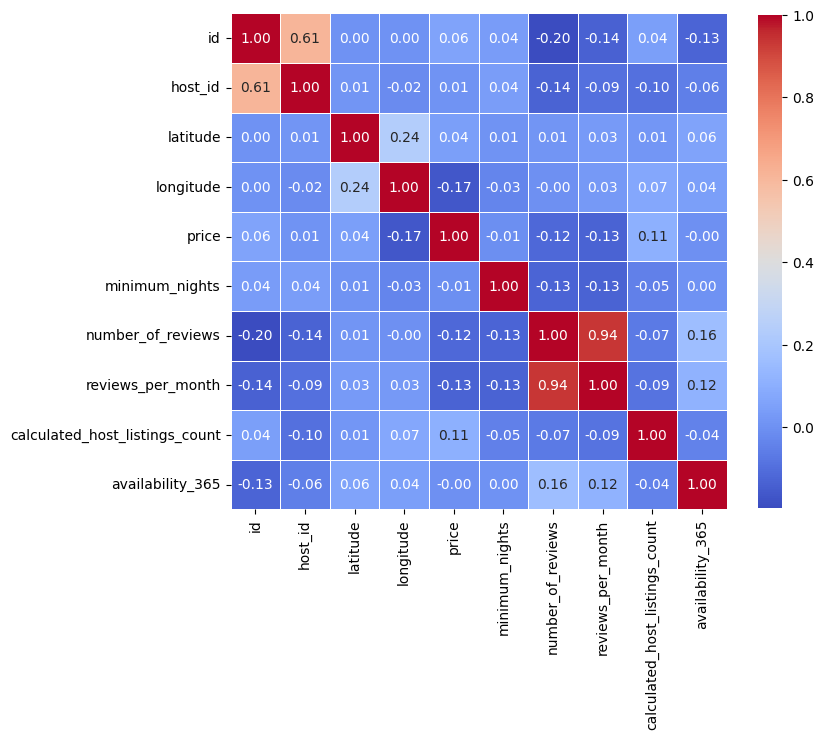

In [15]:
import seaborn as sns
import numpy as np

# Define the correlation matrix plotting function
def plotCorrelationMatrix(df, graphWidth):
    # Remove non-numeric columns
    df_numeric = df.select_dtypes(include=[np.number])

    # Calculate the correlation matrix
    corr = df_numeric.corr()

    # Set up the matplotlib figure
    plt.figure(figsize=(graphWidth, graphWidth))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=0.5)

    # Display the plot
    plt.show()

# Plot the correlation matrix
plotCorrelationMatrix(df1, 8)


**plotScatterMatrix(df1, 20, 10)**

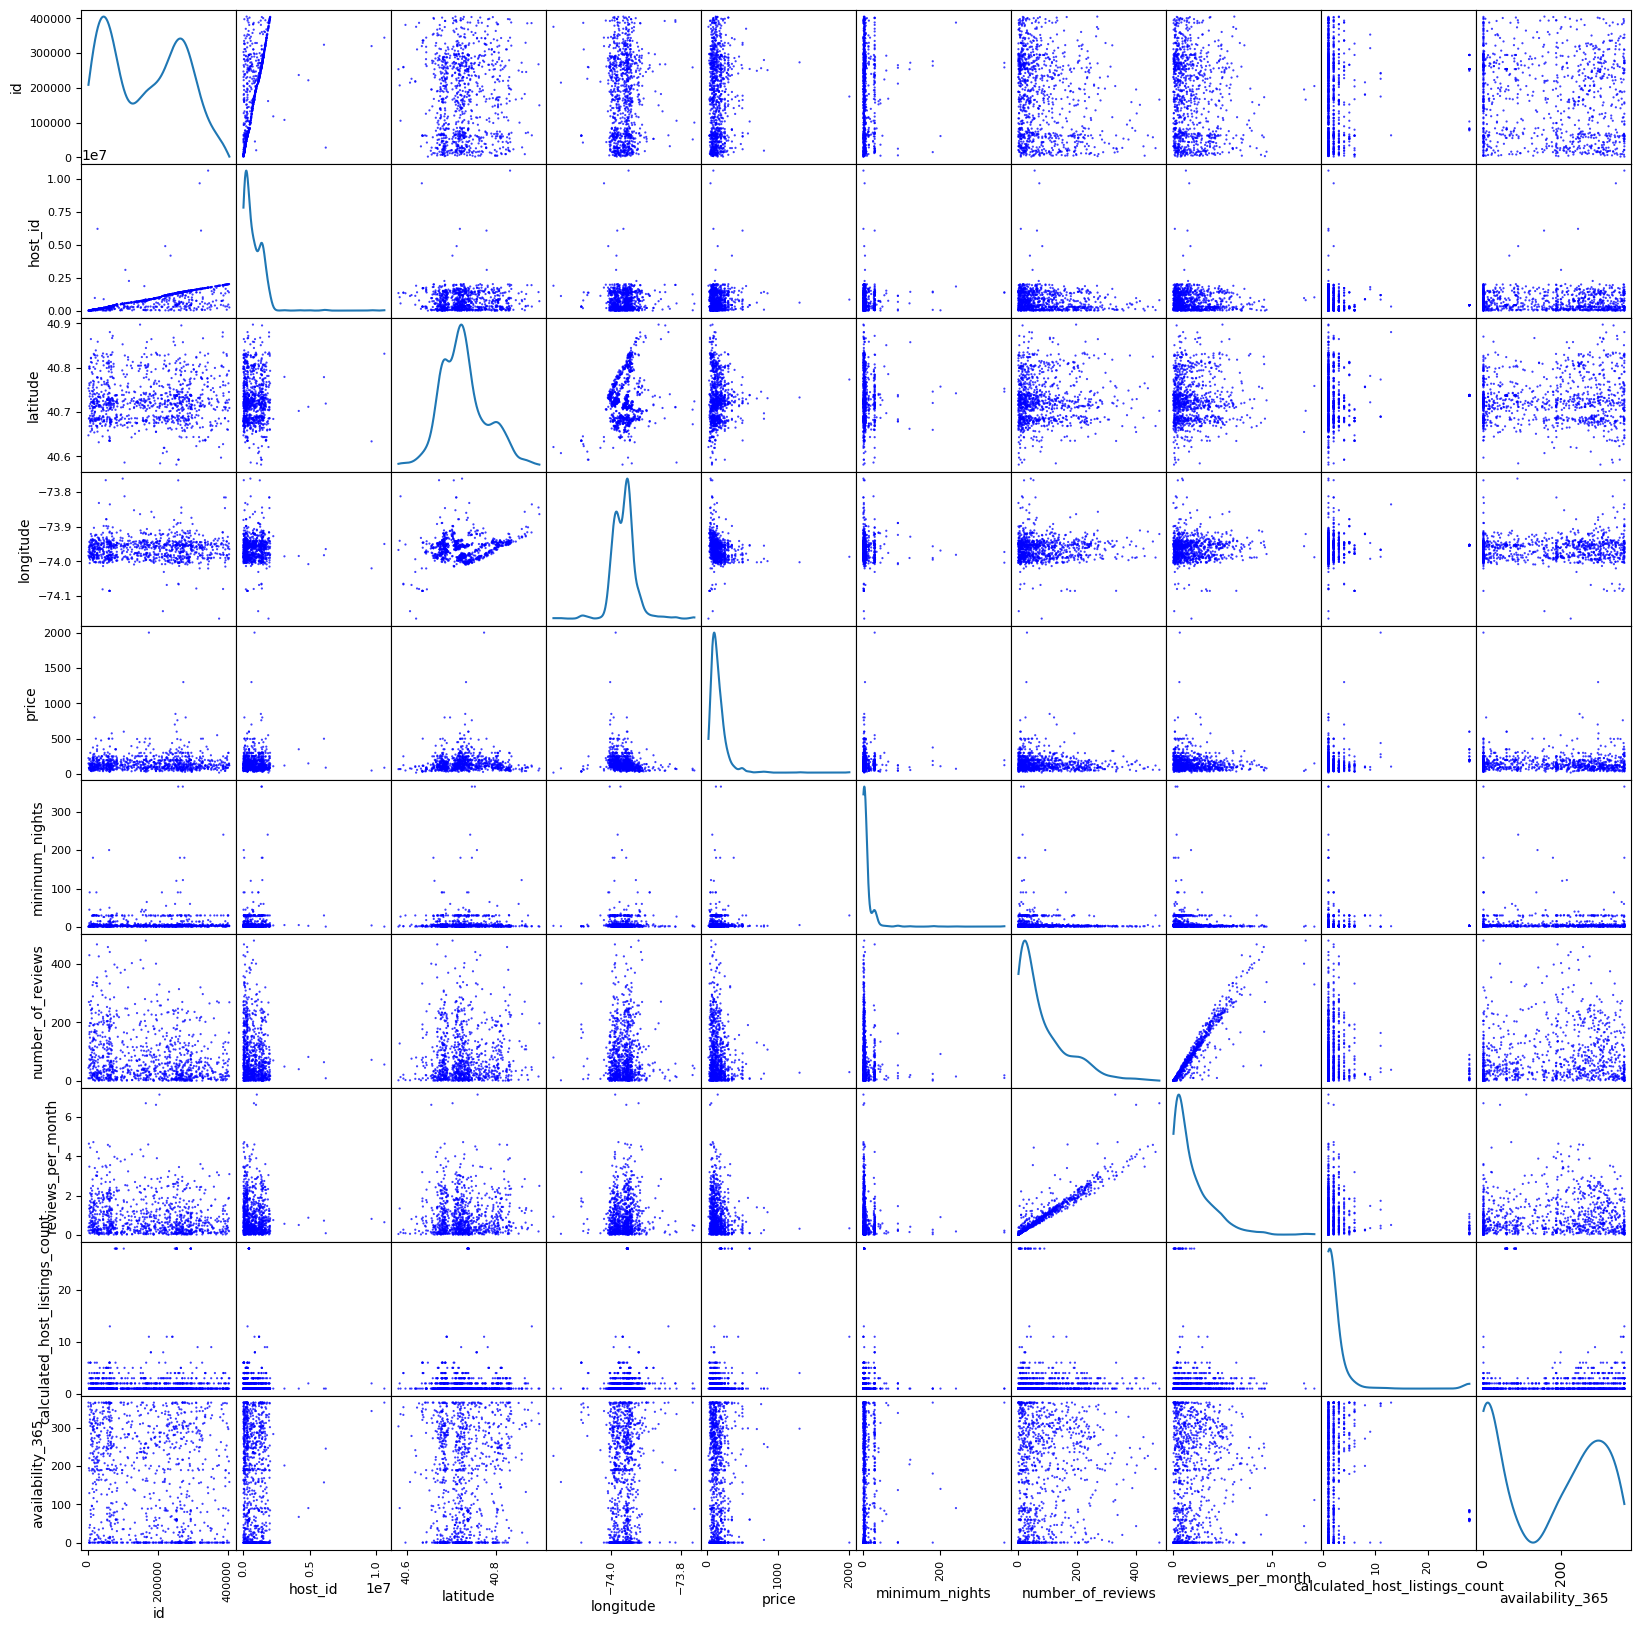

In [16]:
# Define the scatter matrix plotting function
from pandas.plotting import scatter_matrix

def plotScatterMatrix(df, plotSize, textSize):
    # Remove non-numeric columns
    df_numeric = df.select_dtypes(include=[np.number])

    # Remove rows with missing values
    df_numeric = df_numeric.dropna(axis=0)

    # Create scatter matrix
    scatter_matrix(df_numeric, figsize=(plotSize, plotSize), diagonal='kde', alpha=0.75, color='blue', s=10, hist_kwds={'bins': 30}, range_padding=0.1)

    # Adjust the font size of the tick labels
    plt.xticks(fontsize=textSize)
    plt.yticks(fontsize=textSize)

    # Display the plot
    plt.show()

# Plot the scatter matrix
plotScatterMatrix(df1, 20, 10)
